# Hands-on Machine Learning - Chapter 6
# Decision Trees

# Workplace Setup

In [1]:
# Python v3.5 or above required 
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn >= 0.20 required
import sklearn
assert sklearn.__version__ >= "0.20"

# Data and file manipulation instructions
import numpy as np
import os 

# Seed random number generator
np.random.seed(42) 

# For plotting pretty figures
import matplotlib as mpl 
import matplotlib.pyplot as plt 
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Need to save figures to file for this notebook
ROOT_DIR = "./"
IMAGES_PATH = os.path.join(ROOT_DIR, 'images')
os.makedirs(IMAGES_PATH, exist_ok=True)

In [2]:
def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure ", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Training and Visualizing Trees

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [4]:
# Loading the data
iris = load_iris()

In [5]:
# Extracting features and labels
X = iris.data[:, 2:]   # Petal length and width
y = iris.target 

In [6]:
# Instantiating a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2)

In [7]:
# Fitting it to the training data
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

It fit almost instantly. Is this bcause the `iris` dataset does not contain a lot of samples?

In [8]:
X.shape

(150, 2)

Yes. There are only 2 features in for each sample, and there are only 150 samples.

## Visualizing a Decision Tree

Using the `export_graphviz()` function, can make a `dot` file that can then be converted to PDF/PNG/SVG/JPEG or other image format. 

The `dot` file shows how the `DecisionTreeClassifier` learns to make classifications.

The following two cells will save the `dotfile` in the specified directory. We will then have to convert it to an image by entering the following commands in the terminal.

`$ dot -Tpng iris_tree.dot -o iris_tree.png`

In [9]:
from sklearn.tree import export_graphviz

In [10]:
export_graphviz(decision_tree=tree_clf, out_file=os.path.join(IMAGES_PATH, 'iris_tree.dot'), 
                                                             feature_names=iris.feature_names[2:], 
                                                             class_names=iris.target_names, 
                                                             rounded=True, 
                                                              filled=True)

## Decision Tree Boundaries

In [11]:
from matplotlib.colors import ListedColormap

In [12]:
def plot_decision_boundary(clf, X, y, axes=[0., 7.5, 0, 3], iris=True, 
                          legend=False, plot_training=True):
    
    # Create 100 linearly spaced values between the endpoints of horizontal axis
    x1s = np.linspace(axes[0], axes[1], 100)
    
    # Create 100 linearly spaced values between endpoints of vertical axis
    x2s = np.linspace(axes[2], axes[3], 100)
    
    # Combine these values into a 100 x 100 grid of values - these are features
    x1, x2 = np.meshgrid(x1s, x2s)
    
    # Make a column by concatenating all x1 values with all x2 values - these 
    # can be passed to the classifier as a numpy array of features for predictions
    X_new = np.c_[x1.ravel(), x2.ravel()]
    
    # Make predictions on the entire space of x1 and x2 
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    # Custom colours for the different regions our input space will be split into
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    
    # Make a contour map - regions with same values of y will be coloured same according
    # to the custom colormap we have defined
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    
    # Change the colormap if not plotting the iris dataset
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    
    # If also plotting the training sample, index all feature pairs from features set
    # which belong to a specific class. Assign them different labels and markers
    if plot_training:
        plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'yo', label='Iris Setosa')
        plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs', label='Iris Versicolor')
        plt.plot(X[:, 0][y == 2], X[:, 1][y == 2], 'g^', label='Iris Virginica')
    
    # Axes labels specific if plotting iris dataset, otherwise generic 
    if iris:
        plt.xlabel('Petal Length', fontsize=14)
        plt.ylabel('Petal Width', fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    
    # If also plotting a legend, make sure it is on the lower right
    if legend:
        plt.legend(loc='lower right', fontsize=14)

Saving figure  decision_tree_decision_boundaries_plot


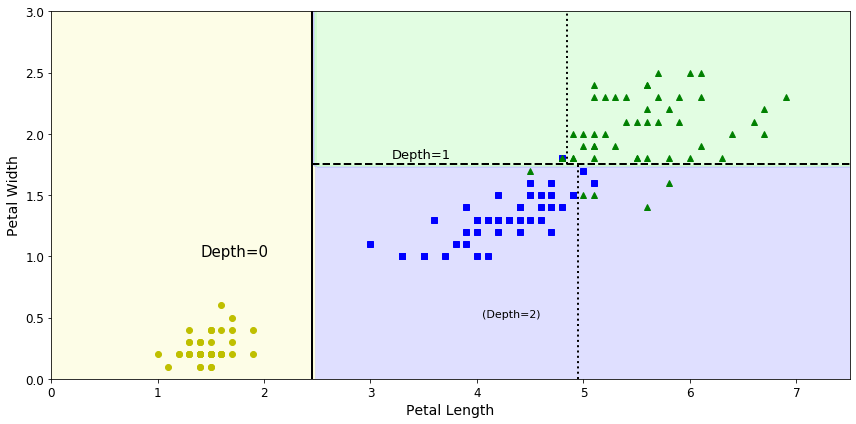

In [13]:
# Create a new figure in which to display the decision boundaries for the tree classifier
plt.figure(figsize=(12, 6))

# Using our predefined function
plot_decision_boundary(tree_clf, X, y)

# Manually plotting lines to mark decision boundaries
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)

# Manually adding depth labels - makes it easier to relate to the tree diagram
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

# This is a nice diagram. I am going to save it 
save_fig('decision_tree_decision_boundaries_plot')

# Predicting Classes and Class Probabilities

What is the probability that a petal with length of 5cm and width 1.5cm belongs to each of the three classes?

In [14]:
tree_clf.predict_proba([[5, 1.5]])  # [[petal_width, petal_length]]

array([[0.        , 0.90740741, 0.09259259]])

In [15]:
# Can also just predict the class - will be the one with the highest probability
tree_clf.predict([[5, 1.5]])

array([1])

# Decision Tree for `moons` Dataset

The `moons` dataset is a simple toy dataset for visualizing classification algorithms.

In [16]:
from sklearn.datasets import make_moons

In [17]:
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

## Classifier 1 - Unregularized

Using default hyperparameters, so the classifier is not regularized. It is free to fit the data as closely as it can. 

In [18]:
deep_tree_clf1 = DecisionTreeClassifier(random_state=42)

In [19]:
deep_tree_clf1.fit(Xm, ym)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

## Classifier 2 - Regularized 

By simply definining the `min_samples_leaf` hyperparameter, we are regularizing the decision tree by limiting the number of minimum samples required before a specific node in the decision tree can be considered a leaf. 

This will affect the number and nature of splits in the decision tree.

In [20]:
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)

In [21]:
deep_tree_clf2.fit(Xm, ym)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

## Plotting the Effect of `min_tree_samples`

Text(0, 0.5, '')

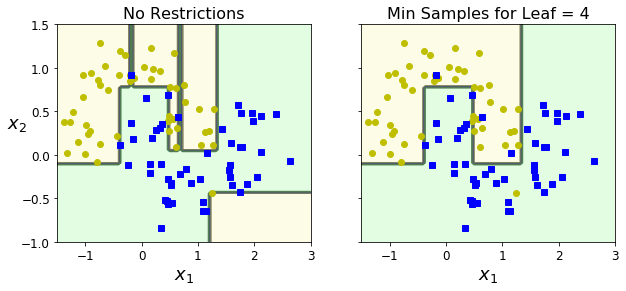

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharey=True)

# All modifications being made to the left plot - unregularized model
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 3, -1, 1.5], iris=False)
plt.title('No Restrictions', fontsize=16)

# All modifications made to the right plot - regularized model
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 3, -1, 1.5 ], iris=False)
plt.title(f"Min Samples for Leaf = {deep_tree_clf2.min_samples_leaf}", fontsize=16)
plt.ylabel("")

# Regression Tree - Example 1 

## Quadratic Dataset

In [23]:
np.random.seed(42)
m = 200                            # Number of training samples
X = np.random.rand(m, 1)           # Features are `m` random numbers
y = 4 * (X - 0.5) ** 2             # Quadratic expression 
y = y + np.random.randn(m, 1) / 10 # Adding random noise

## Regression Tree

In [24]:
from sklearn.tree import DecisionTreeRegressor

In [25]:
# Instantiate - limiting to 2 nodes 
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)

In [26]:
# Fit to training data
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [27]:
# Visualizing the regression tree
from sklearn.tree import export_graphviz

In [28]:
export_graphviz(decision_tree=tree_reg, out_file=os.path.join(IMAGES_PATH, 'reg_tree_1.dot'),
               feature_names=['x1'], rounded=True, filled=True)

## Plotting Regression Tree Predictions

In [34]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel='$y$'):
    # Create 500 linearly spaced values between horizontal axis limits 
    # And then Reshape into a 1-dimensional vector
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1) 
    
    # Predictions on this space of values 
    y_pred = tree_reg.predict(x1) 
    
    # Define the axes limits for the figure
    plt.axis(axes)
    
    # Add label to the x-axis
    plt.xlabel("$x_1$", fontsize=18)
    
    # If the user has also specified a ylabel
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    
    # Plot training data with blue dots
    plt.plot(X, y, 'b.')
    
    # Plot predictions as red line - legend should show this 
    plt.plot(x1, y_pred, 'r.-', linewidth=2, label="$\hat{y}$")

## Effect of Tree Depth

In [39]:
# First classifier is same as before - tree depth of 2 
tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)

# Second classifier is different - can have more split 
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)

In [40]:
# Fitting both classifiers to the same data
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

Saving figure  tree_regression_plot


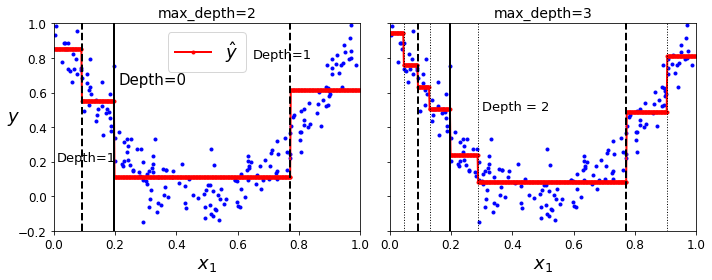

In [41]:
# Creating a figure to compare effect of depth on regression 
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

# First figure - depth = 2 
plt.sca(axes[0])
plot_regression_predictions(tree_reg_clf1, X, y)

# Add decision boundaries - decision boundaries found by inspecting the .dot file
for split, style in ((0.1973, 'k-'), (0.0917, 'k--'), (0.7718, 'k--')):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)

# Annotating the splits
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

# Second figure - depth of 3
plt.sca(axes[1])
plot_regression_predictions(tree_reg_clf2, X, y, ylabel=None)

# Splits at depth 1
for split, style in ((0.1973, 'k-'), (0.0917, 'k--'), (0.7718, 'k--')):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)

# Splits at depth 2
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], 'k:', linewidth=1)

plt.text(0.3, 0.5, 'Depth = 2', fontsize=13)
plt.title('max_depth=3', fontsize=14)

save_fig('tree_regression_plot')
plt.show()

## Overfitting in Regression Trees

In [42]:
# Instantiate two Regression Trees - regularized and unregularized
tree_reg3 = DecisionTreeRegressor(random_state=42)
tree_reg4 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)

In [43]:
# Fitting to the quadaratic data
tree_reg3.fit(X, y)
tree_reg4.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [44]:
# Creating matrix of values on which to predict
x1 = np.linspace(0, 1, 500).reshape(-1, 1)

In [46]:
y_pred3 = tree_reg3.predict(x1)
y_pred4 = tree_reg4.predict(x1)

In [47]:
# Plotting the effect of min_samples_leaf on regression trees

Saving figure  tree_regression_regularization_plot


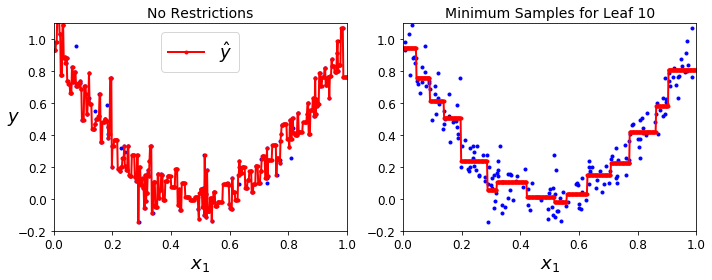

In [50]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

plt.sca(axes[0])
plt.plot(X, y, 'b.')
plt.plot(x1, y_pred3, 'r.-', linewidth=2, label=r'$\hat{y}$')
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', fontsize=18, rotation=0)
plt.legend(loc='upper center', fontsize=18)
plt.title('No Restrictions', fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, 'b.')
plt.plot(x1, y_pred4, 'r.-', linewidth=2, label=r'$\hat{y}$')
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel('$x_1$', fontsize=18)
plt.title(f'Minimum Samples for Leaf {tree_reg4.min_samples_leaf}', fontsize=14)

save_fig('tree_regression_regularization_plot')
plt.show()

# Instability in Decision Trees

## Issue 1 - Orthogonal Splits

The 'orientation' of the data in `n`-dimensional space greatly affects the decision boundary of a Decision Tree Classifier. Decision boundaries are always orthogonal to an axis. This can cause problems - if the features are not orthogonal to each other, the Decision Tree's classification boundary will be more complicated than needed, and will not generalize well.

### Random Data

In [51]:
np.random.seed(6)

In [52]:
# 100 vectors of 2 random floats, all centered centered at 0 between
Xs = np.random.rand(100, 2) - 0.5

In [56]:
# Wherever the first feature is positive, the target is 2.0, otherwise 0.0
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

In [58]:
# Rotating the features in 2D space using a 2D rotation matrix
angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], 
                           [np.sin(angle), np.cos(angle)]])
Xs_rotated = Xs.dot(rotation_matrix)

In [60]:
# Training one classifier using the original data
tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [61]:
# Training the second decision tree classifier using rotated data
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xs_rotated, ys)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

Text(0.5, 1.0, 'Rotated Data')

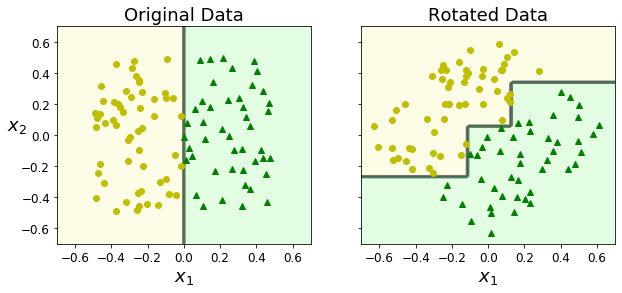

In [64]:
# Plotting the decision boundaries for both classifiers
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

# Tree fitted to original data
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.title("Original Data", fontsize=18)

# Tree fitted to rotated data
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xs_rotated, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("")    # Already plotted by the first subplot 
plt.title("Rotated Data", fontsize=18)

### Iris Data

In [82]:
from sklearn.datasets import load_iris

In [83]:
iris = load_iris()

In [85]:
# Extracting features and targets
X = iris.data[:, 2:]
y = iris.target

In [87]:
# Defining a rotation matrix to change the features
angle = np.pi / 180 * 20 
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], 
                            [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

In [88]:
# Train a new classifier 
tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

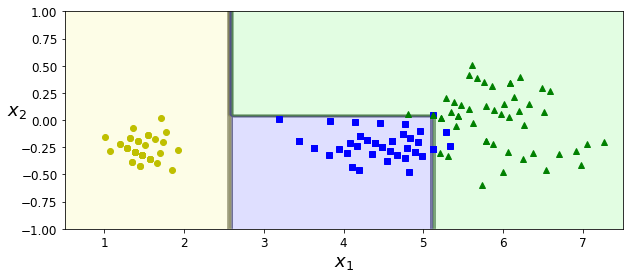

In [90]:
# Decision boundaries and splits after rotation
plt.figure(figsize=(10, 4))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1.0], iris=False)

## Issue 2 - Affected by Outliers 

The more general issue here is that the decision boundary of a `DecisionTreeClassifier` is, in general, depends too much on the data. It will be skewed by outliers, or by the values of the data. 

In the following code, we're retraining a `DecisionTreeClassifier` on the `iris` dataset. The only difference is that we will be dropping the largest flower (the one with the longest and widest petals) from the dataset. 

Removing only one flower from the dataset will drastically change the decision boundaries and splits returned by the tree.

In [66]:
from sklearn.datasets import load_iris

In [69]:
iris = load_iris()

In [71]:
# Extracting the petal length and petal width 
X = iris.data[:, 2:]

# Extracting the species 
y = iris.target

In [73]:
# Get feature values for the widest Iris versicolor flower from the dataset
X[(X[:, 1] == X[:, 1][y == 1].max()) & (y == 1)]

array([[4.8, 1.8]])

In [74]:
# Extract all features except the ones for this flower
not_widest_versicolor = (X[:, 1] != 1.8) | (y == 2)

In [75]:
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

In [77]:
# Training a classifier using the tweaked data
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=40,
            splitter='best')

Text(1.0, 1.8, 'Depth = 1')

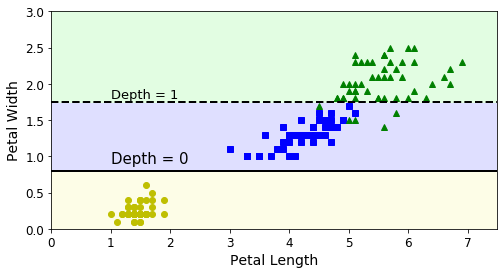

In [79]:
# Plot the new classifier's decision boundaries 
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)

# Split coordinates found by inspecting the tree's dot file
plt.plot([0, 7.5], [0.8, 0.8], 'k-', linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], 'k--', linewidth=2)

# Annotate the plot
plt.text(1.0, 0.9, 'Depth = 0', fontsize=15)
plt.text(1.0, 1.80, 'Depth = 1', fontsize=13)